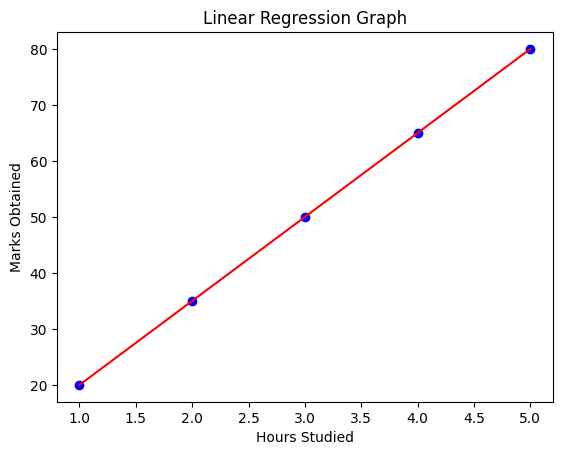

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data
data = {'hours': [1, 2, 3, 4, 5], 'marks': [20, 35, 50, 65, 80]}
df = pd.DataFrame(data)

# Features and target
X = df[['hours']]  
y = df['marks']

# Train the model
lr = LinearRegression()
lr.fit(X, y)

# Predict the output
Predicted = lr.predict(X)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, Predicted, color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')
plt.title('Linear Regression Graph')
plt.show()


In [44]:
# 3. Startup Profit Prediction 
# Problem Statement: Predict profit for a startup based on investments in R&D, Marketing, and Administration.
#  Features: R&D Spend.  Administration Spend. Marketing Spend. State (encoded)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
df = pd.read_csv('/Users/madhurshinde/Downloads/50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
df = pd.get_dummies(df, columns=['State'], drop_first=True)


In [48]:
X = df.drop(columns=['Profit'])
y = df['Profit']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [51]:
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.8987266414328636
RMSE: 9055.957323458468


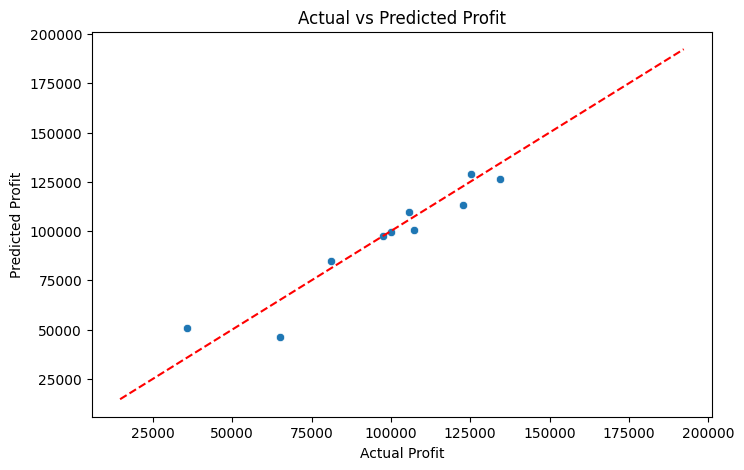

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.show()


In [1]:
#car 
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('car_data.csv')

# Display first few rows
print(df.head())
print(df.describe())
print(df.info())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   

In [3]:
# Data cleaning and preprocessing
# Check for missing values
print("\n Checking for missing values:\n")
print(df.isnull().sum())
df.dropna(inplace=True)

# Convert 'year' to vehicle age
df['car_age'] = 2025 - df['year']


 Checking for missing values:

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


In [4]:
# Encoding categorical variables
le_fuel = LabelEncoder()
le_seller = LabelEncoder()
le_transmission = LabelEncoder()

In [5]:
df['fuel'] = le_fuel.fit_transform(df['fuel'])
print(df['fuel'])
df['seller_type'] = le_seller.fit_transform(df['seller_type'])
df['transmission'] = le_transmission.fit_transform(df['transmission'])

0       4
1       4
2       1
3       4
4       1
       ..
4335    1
4336    1
4337    4
4338    1
4339    4
Name: fuel, Length: 4340, dtype: int64


In [6]:
# Selecting relevant features
X = df[['car_age', 'km_driven', 'fuel', 'seller_type', 'transmission']]
y = df['selling_price']

In [7]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 185680440881.24225
R² Score: 0.3915513752548132


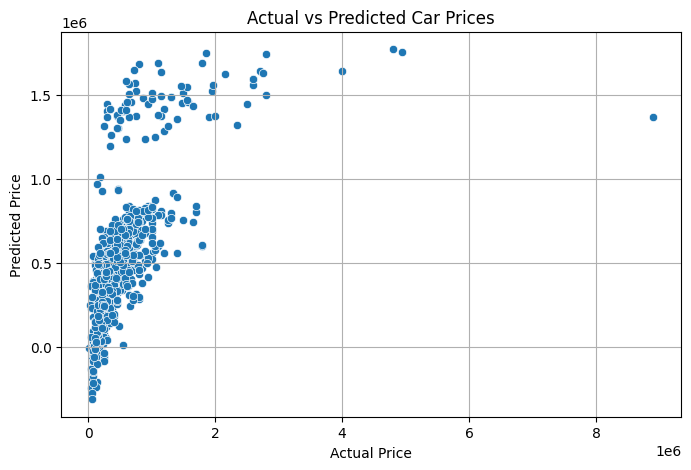

In [11]:
# Plotting Actual vs Predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid()
plt.show()

In [12]:
import pandas as pd

# Replace 'filename.csv' with the actual path to your CSV file
df = pd.read_csv('housing.csv')

# To preview the first 5 rows
print(df.head(5))
print(df.tail(5))

df.info()
df.describe()

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


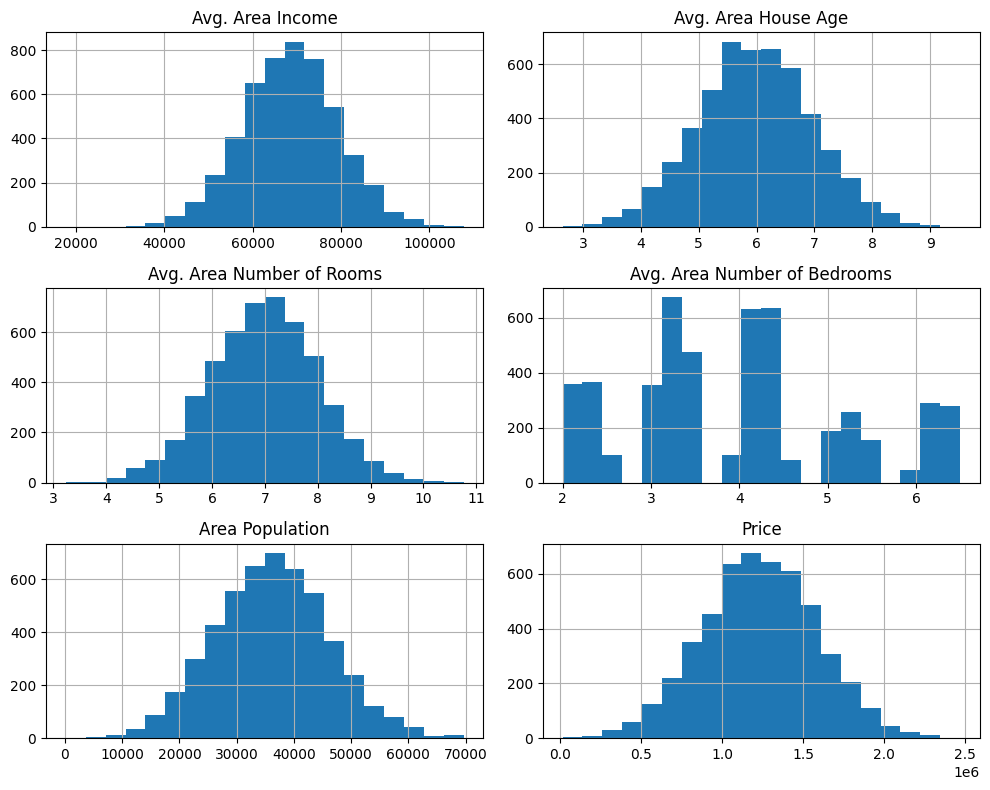

In [13]:
import matplotlib.pyplot as plt

# Display histograms for all numeric columns
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for a single numeric column, e.g., 'SalePrice'
sns.histplot(df['SalePrice'], kde=True, bins=20)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

KeyError: 'SalePrice'

Top 5 rows:
    Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA... 

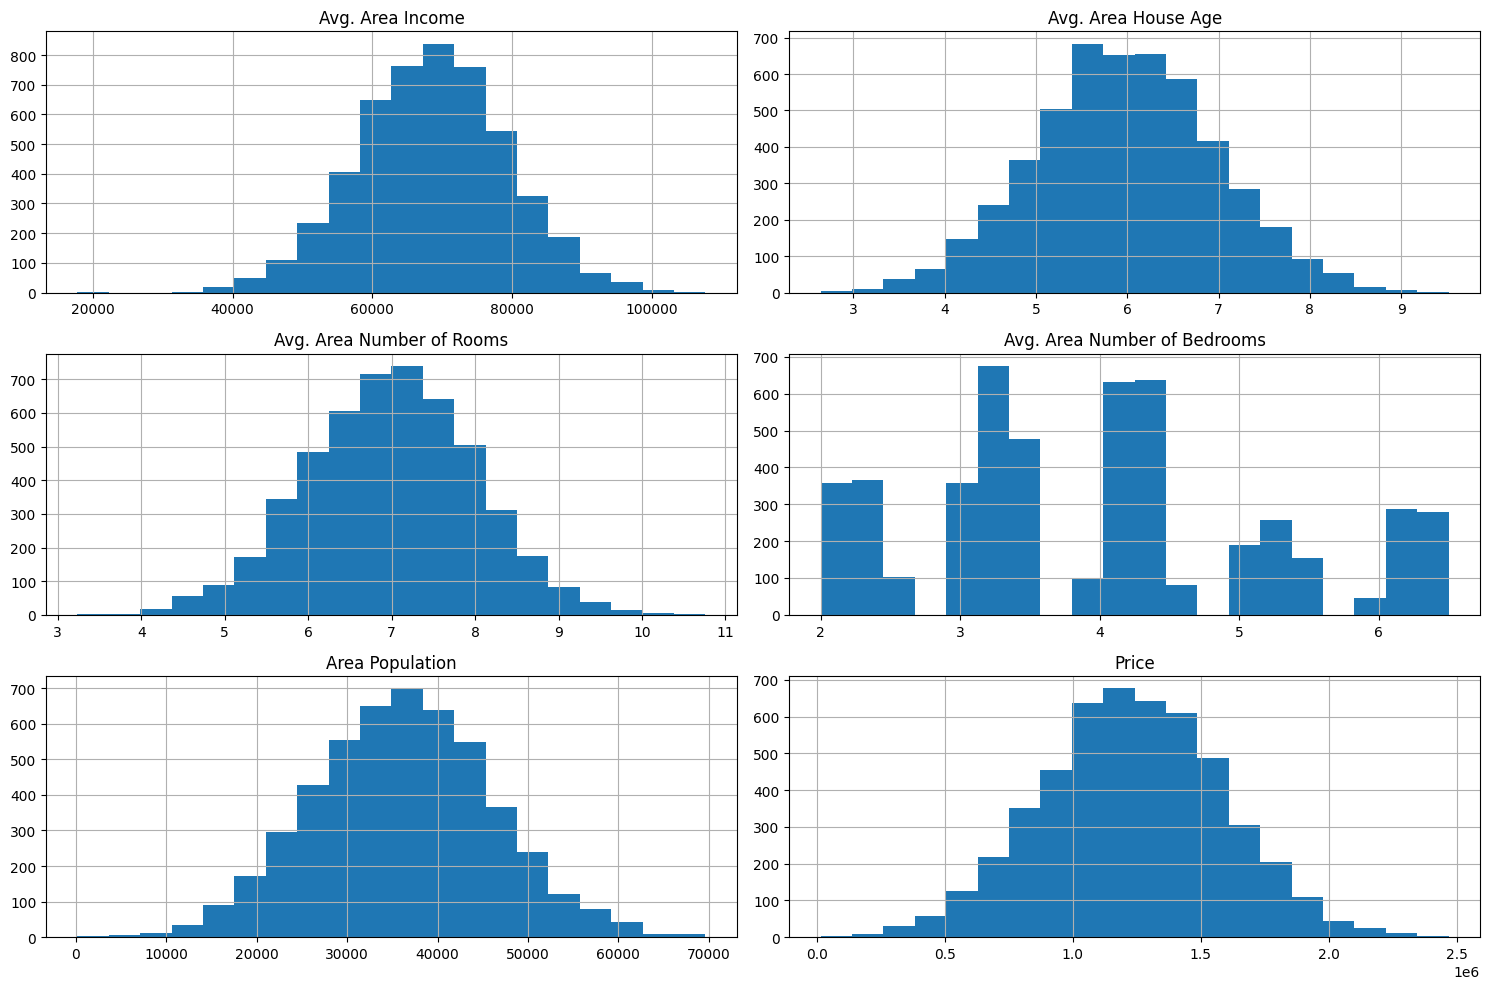


Null values in each column:
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Numeric Fields:
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'Price']


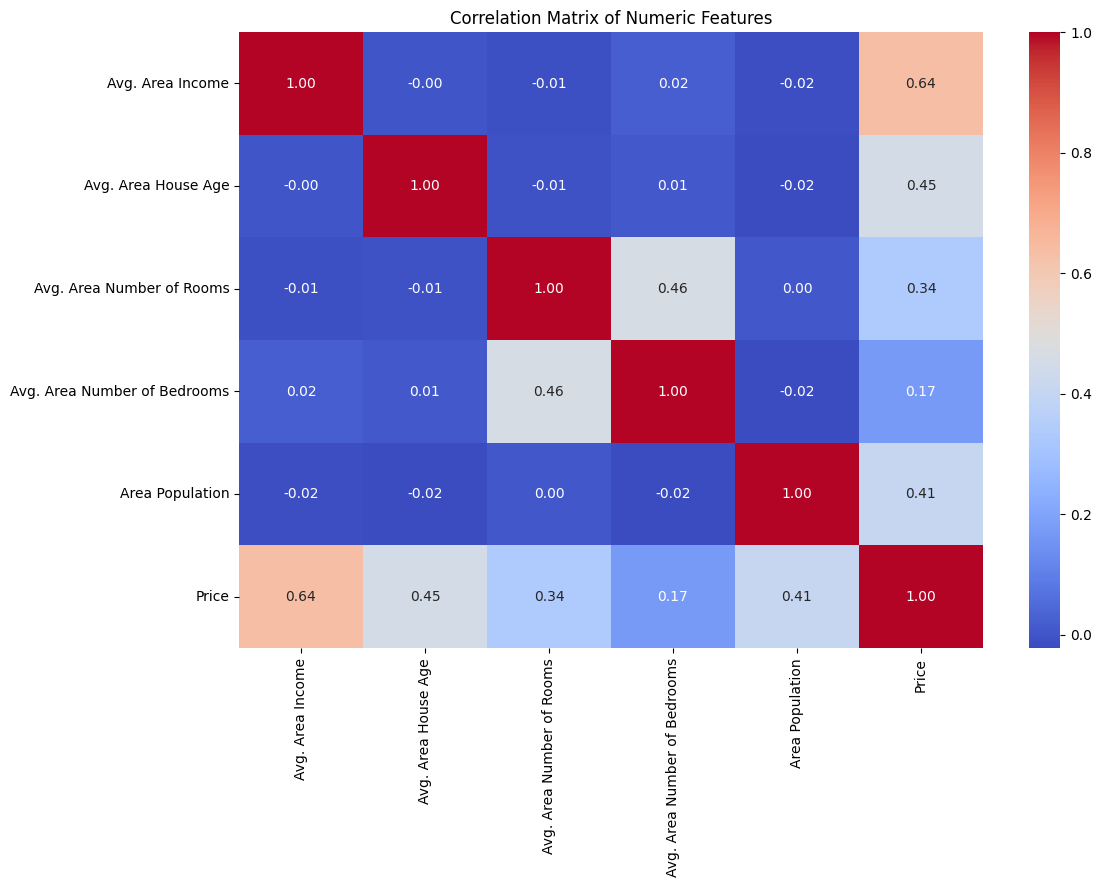


Categorical Features:
['Address']

Nominal Features: ['Neighborhood', 'HouseStyle']
Ordinal Features: ['OverallQual', 'ExterCond']


KeyError: "None of [Index(['OverallQual', 'ExterCond'], dtype='object')] are in the [columns]"

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Import the data file (update filename if needed)
df = pd.read_csv("housing.csv")  # replace with actual filename

# Step 3: Display the contents (top and bottom 5 rows)
print("Top 5 rows:\n", df.head())
print("\nBottom 5 rows:\n", df.tail())

# Step 4: Display histograms of some numeric fields
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Step 5: Find out null values in the data
null_counts = df.isnull().sum()
print("\nNull values in each column:\n", null_counts)

# Optional: Drop or fill null values (e.g., fill numeric with median)
df_filled = df.fillna(df.median(numeric_only=True))

# Step 6: Find out which are the numeric fields
print("\nNumeric Fields:")
print(numeric_cols.tolist())

# Step 7: Analyze correlations between numeric features
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Step 8: List categorical features
categorical_cols = df.select_dtypes(include='object').columns
print("\nCategorical Features:")
print(categorical_cols.tolist())

# Optional: Divide into nominal and ordinal if known
nominal_features = ['Neighborhood', 'HouseStyle']  # example
ordinal_features = ['OverallQual', 'ExterCond']    # example

print("\nNominal Features:", nominal_features)
print("Ordinal Features:", ordinal_features)

# Step 9: Convert ordinal features to nominal using One-Hot Encoding

# 1. Convert ordinal columns to string to treat them as nominal
df_filled[ordinal_features] = df_filled[ordinal_features].astype(str)

# 2. Apply One-Hot Encoding to ordinal features
df_encoded = pd.get_dummies(df_filled, columns=ordinal_features)

# 3. (Optional) Also encode nominal features if needed
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features)

# Display the updated column names after encoding
print("\nData after One-Hot Encoding - Columns:\n", df_encoded.columns.tolist())

In [16]:
# Step 9: Convert ordinal features to nominal using One-Hot Encoding

# 1. Convert ordinal columns to string to treat them as nominal
print(df_filled)
print(ordinal_features)
df_filled[ordinal_features] = df_filled[ordinal_features].astype(str)
#print(ordinal_features)

# 2. Apply One-Hot Encoding to ordinal features
#df_encoded = pd.get_dummies(df_filled, columns=ordinal_features)

# 3. (Optional) Also encode nominal features if needed
#df_encoded = pd.get_dummies(df_encoded, columns=nominal_features)

# Display the updated column names after encoding
#print("\nData after One-Hot Encoding - Columns:\n", df_encoded.columns.tolist())

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09      23

KeyError: "None of [Index(['OverallQual', 'ExterCond'], dtype='object')] are in the [columns]"